# Titanic Data Analysis and Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [13]:
train = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [4]:
print(f'The length of the training dataset is: {len(train)}')
print(f'The length of the testing dataset is: {len(test)}')

The length of the training dataset is: 891
The length of the testing dataset is: 418


In [14]:
print(f'Number of columns in train dataset: {len(train.columns)}')  #checking for the number of columns.
print(f'Number of columns in test dataset: {len(test.columns)}') #Survived column is not in testing dataset.

Number of columns in train dataset: 12
Number of columns in test dataset: 11


In [8]:
pd.set_option('precision', 4) #setting decimal place values
pd.set_option('max_columns', 12) #maximum column to appear

In [15]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- EDA and Feature Engineering.

In [77]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Analysing data
- Checking target distribution where 1 is for Survived and 0 is for Not Survived

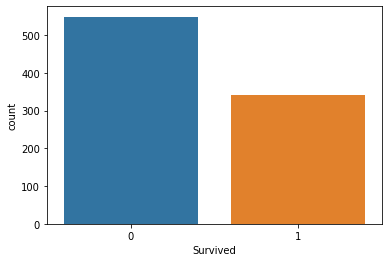

In [16]:
sns.countplot(target) #Survival rate

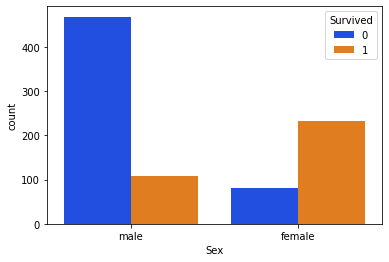

In [25]:
#comparing male to female ratio of those that survived 
sns.countplot(x='Sex', hue= 'Survived', data=train, palette = 'bright') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023574283708>]],
      dtype=object)

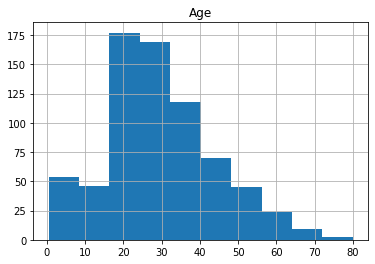

In [28]:
train.hist('Age')

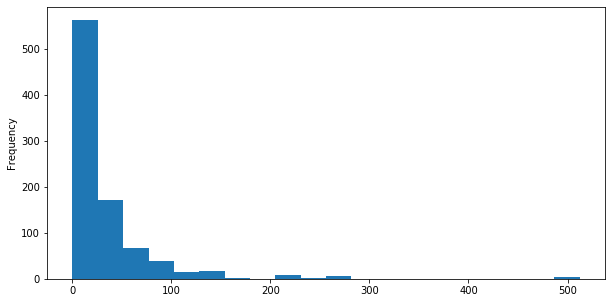

In [29]:
train['Fare'].plot.hist(bins=20, figsize=(10,5))

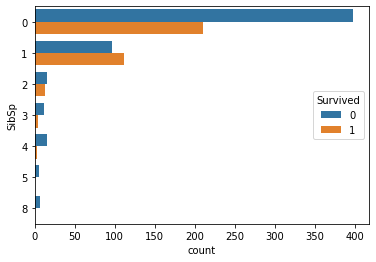

In [32]:
sns.countplot(y='SibSp', hue = "Survived", data=train)

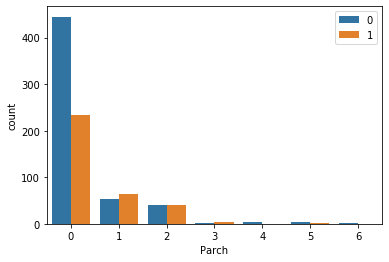

In [36]:
sns.countplot(x='Parch', hue = "Survived", data=train)
plt.legend(loc = 'upper right')

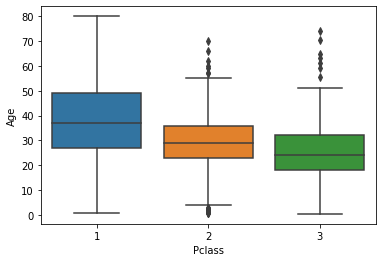

In [38]:
sns.boxplot(x='Pclass', y='Age', data=train)

# Data Wrangling

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [40]:
target = train['Survived']

In [41]:
train = train.drop('Survived', axis=1) #dropping survived column 

In [43]:
data = train.append(test) #concatenating both train and test data for pre processing
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
target = pd.DataFrame(target)
target.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [45]:
data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [46]:
#dropping columns with high number of missing values
data.drop(['Age', 'Cabin'], axis = 1, inplace = True)

In [47]:
data.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S


In [48]:
data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       2
dtype: int64

In [49]:
#filling missing fare value with mean value
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [50]:
#using forward-fill to fill the missing value in the Embarked column
data['Embarked'] = data['Embarked'].fillna(method = 'ffill')

In [51]:
data.isnull().sum() #all the missing values have been catered for through data munging

PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [52]:
data.info() #all the missings 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Ticket       1309 non-null   object 
 7   Fare         1309 non-null   float64
 8   Embarked     1309 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 102.3+ KB


In [53]:
#preprocessing and dropping of some columns with low correlation
data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace = True) 

In [54]:
data['Embarked'].unique() 

array(['S', 'C', 'Q'], dtype=object)

In [55]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [56]:
#transforming columns with one_hot_encoding
embarked_dummies = pd.get_dummies(data.Embarked)
data = pd.concat([data,embarked_dummies], axis=1)
data = data.drop("Embarked", axis=1)

sex_dummies= pd.get_dummies(data.Sex)
data = pd.concat([data,sex_dummies], axis=1)
data = data.drop("Sex", axis=1)

In [57]:
data.head()

,Pclass,SibSp,Parch,Fare,C,Q,S,female,male
0,3,1,0,7.2500,0,0,1,0,1
1,1,1,0,71.2833,1,0,0,1,0
2,3,0,0,7.9250,0,0,1,1,0
3,1,1,0,53.1000,0,0,1,1,0
4,3,0,0,8.0500,0,0,1,0,1


In [36]:
(data.shape) #train and train data shape

(1309, 9)

In [60]:
new_train_data = data.iloc[:891,]
new_train_data

,Pclass,SibSp,Parch,Fare,C,Q,S,female,male
0,3,1,0,7.2500,0,0,1,0,1
1,1,1,0,71.2833,1,0,0,1,0
2,3,0,0,7.9250,0,0,1,1,0
3,1,1,0,53.1000,0,0,1,1,0
4,3,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,2,0,0,13.0000,0,0,1,0,1
887,1,0,0,30.0000,0,0,1,1,0
888,3,1,2,23.4500,0,0,1,1,0
889,1,0,0,30.0000,1,0,0,0,1


In [61]:
new_test_data = data.iloc[891:,]
new_test_data

,Pclass,SibSp,Parch,Fare,C,Q,S,female,male
0,3,0,0,7.8292,0,1,0,0,1
1,3,1,0,7.0000,0,0,1,1,0
2,2,0,0,9.6875,0,1,0,0,1
3,3,0,0,8.6625,0,0,1,0,1
4,3,1,1,12.2875,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
413,3,0,0,8.0500,0,0,1,0,1
414,1,0,0,108.9000,1,0,0,1,0
415,3,0,0,7.2500,0,0,1,0,1
416,3,0,0,8.0500,0,0,1,0,1


# Modelling 
- hyperparameter tuning and using of various classification model tools to pick the best model.

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [63]:
estimators = {
    'Logisitic_Regression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(gamma = 'auto'),
    'GaussianNB': GaussianNB(),
    'discriminant_analysis': LinearDiscriminantAnalysis()
}

- KFold Cross validation

In [64]:
#using Kfold and cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [65]:
for name, code in estimators.items():
    kfold = StratifiedKFold(n_splits=10, random_state=11 , shuffle=True)
    cv_result = cross_val_score(code, X = new_train_data, y = target,
                            cv = kfold, scoring= 'accuracy')
    print(f'{name:>20}: ' + 
          f'mean accuracy={cv_result.mean():.2%}; ' +
          f'standard deviation={cv_result.std():.2%}')

Logisitic_Regression: mean accuracy=78.34%; standard deviation=4.58%
KNeighborsClassifier: mean accuracy=77.33%; standard deviation=4.08%
DecisionTreeClassifier: mean accuracy=81.03%; standard deviation=4.01%
RandomForestClassifier: mean accuracy=80.02%; standard deviation=3.95%
                 SVC: mean accuracy=76.99%; standard deviation=4.20%
          GaussianNB: mean accuracy=78.79%; standard deviation=4.42%
discriminant_analysis: mean accuracy=78.90%; standard deviation=3.96%


- Decision Tree gives the highest accuracy score (81.26%)

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, target, random_state=11,test_size = 0.3)

In [67]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(623, 9)

(268, 9)

(623, 1)

(268, 1)

In [68]:
def get_score(X_train, X_test, y_train, y_test):
    model = DecisionTreeClassifier(random_state=11)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_test)
    acc_score = accuracy_score(y_test, preds_val)
    return(acc_score)

In [69]:
my_score = get_score(X_train, X_test, y_train, y_test)
print(f'The accuracy score of the model is: {(my_score*100):.2f}%.')

The accuracy score of the model is: 81.34%.


- Gradient Boosting

In [70]:
# XGBoost for result improvement
from xgboost import XGBClassifier

my_model1 = XGBClassifier(random_state = 11)
my_model1.fit(X_train, y_train)

preds = my_model1.predict(X_test)
acc = (accuracy_score(y_test, preds))* 100
print(f'Accuracy Score: {acc:.2f}%')

Accuracy Score: 83.58%


Confusion Matrix: 
[[164  12]
 [ 32  60]]


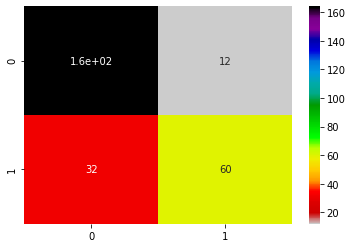

In [76]:
cm = confusion_matrix(y_test, preds)
print(f'Confusion Matrix: \n{cm}')

sns.heatmap(cm, annot=True, cmap='nipy_spectral_r')

In [75]:
crpt = classification_report(y_test, preds)
print(f'Classification Report: \n\n{crpt}')

Classification Report: 

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       176
           1       0.83      0.65      0.73        92

    accuracy                           0.84       268
   macro avg       0.84      0.79      0.81       268
weighted avg       0.84      0.84      0.83       268

